<a href="https://colab.research.google.com/github/PrateekKumar135/TB_CLASSIFICATION_ML/blob/main/EDA_ON_THYROID_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset: -**

**Source**

The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

**Content**

* **Age**: The age of the patient at the time of diagnosis or treatment.
* **Gender**: The gender of the patient (male or female).
* **Smoking**: Whether the patient is a smoker or not.
* **Hx Smoking**: Smoking history of the patient (e.g., whether they have ever smoked).
* **Hx Radiotherapy**: History of radiotherapy treatment for any condition.
* **Thyroid Function**: The status of thyroid function, possibly indicating if there are any abnormalities.
* **Physical Examination**: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
* **Adenopathy**: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
* **Pathology**: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
* **Focality**: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
* **Risk**: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
* **T**: Tumor classification based on its size and extent of invasion into nearby structures.
* **N**: Nodal classification indicating the involvement of lymph nodes.
* **M**: Metastasis classification indicating the presence or absence of distant metastases.
* **Stage**: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
* **Response**: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
* **Recurred**: Indicates whether the cancer has recurred after initial treatment.

**DATASET LOADING**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
disease = pd.read_csv('Thyroid_Disease.csv')

In [ ]:
disease

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
disease.shape #no. of rows & columns in the dataset

(383, 17)

**DATATYPE OF FEATURE COLUMNS**

In [ ]:
disease.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [ ]:
disease.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CHECKING FOR NULL VALUES IN FEATURE COLUMNS**

In [ ]:
disease.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
col=disease.columns
for i in col[1::]:
    print(f' Unique value in column {i}: - {disease[i].unique()}')

 Unique value in column Gender: - ['F' 'M']
 Unique value in column Smoking: - ['No' 'Yes']
 Unique value in column Hx Smoking: - ['No' 'Yes']
 Unique value in column Hx Radiothreapy: - ['No' 'Yes']
 Unique value in column Thyroid Function: - ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
 Unique value in column Physical Examination: - ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
 Unique value in column Adenopathy: - ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
 Unique value in column Pathology: - ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
 Unique value in column Focality: - ['Uni-Focal' 'Multi-Focal']
 Unique value in column Risk: - ['Low' 'Intermediate' 'High']
 Unique value in column T: - ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
 Unique value in column N: - ['N0' 'N1b' 'N1a']
 Unique value in column M: - ['M0'

In [ ]:
# disease=disease.replace({'Smoking': {'Yes': 1,
#                                 'No': 0}},inplace=True)
# disease.head(5)

**ONEHOT ENCODED 'YES' & 'NO' INTO BINARY(1 & 0)**

In [ ]:
# from category_encoders import OneHotEncoder
# encoder = OneHotEncoder(cols=['Smoking','Hx Smoking','Hx Radiothreapy','Recurred'],return_df=True,use_cat_names=True)
# # transforming the column after fitting
# newdata = encoder.fit_transform(disease[['Smoking','Hx Smoking','Hx Radiothreapy','Recurred']])
# # concatenating dataframe
# disease = pd.concat([disease, newdata], axis = 1)
# # dropping old column
# disease = disease.drop(['Smoking','Hx Smoking','Hx Radiothreapy','Recurred'], axis = 1)
# disease.head(10)

In [ ]:
# disease[['Smoking','Hx Smoking']]

In [ ]:
disease=disease.sort_values(by='Age')

In [ ]:
disease['age_range'] = pd.cut(disease['Age'], bins=[15,20,35,45,55,65,75,85,90], include_lowest=True,precision=0)

In [ ]:
disease.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,age_range
334,15,F,No,No,No,Euthyroid,Normal,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes,"(14, 20]"
81,17,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,"(14, 20]"
207,17,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No,"(14, 20]"
226,17,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T2,N0,M0,I,Structural Incomplete,Yes,"(14, 20]"
90,18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes,"(14, 20]"


**COUNT OF CATEGORICAL FEATURES AGAINST RISK & RECURRED**

In [ ]:
disease

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,age_range
334,15,F,No,No,No,Euthyroid,Normal,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes,"(14, 20]"
81,17,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,"(14, 20]"
207,17,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No,"(14, 20]"
226,17,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T2,N0,M0,I,Structural Incomplete,Yes,"(14, 20]"
90,18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes,"(14, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,80,F,Yes,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete,Yes,"(75, 85]"
362,80,F,Yes,Yes,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes,"(75, 85]"
276,81,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,II,Excellent,No,"(75, 85]"
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,"(75, 85]"


C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Prateek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs

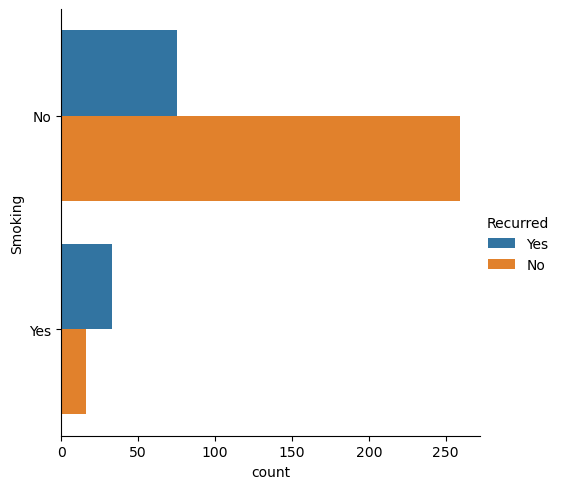

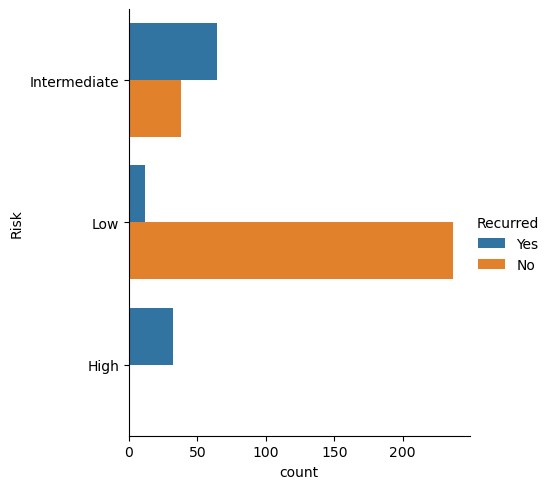

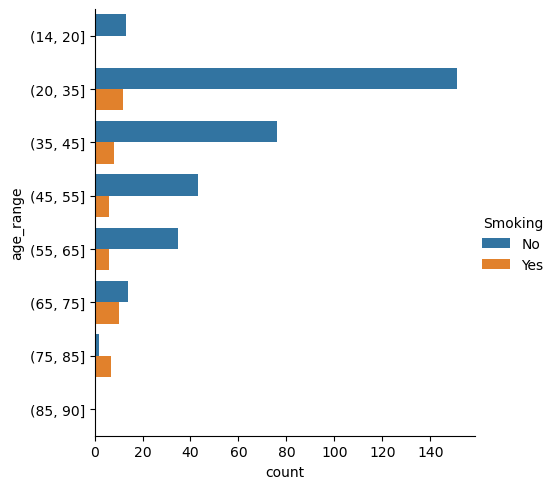

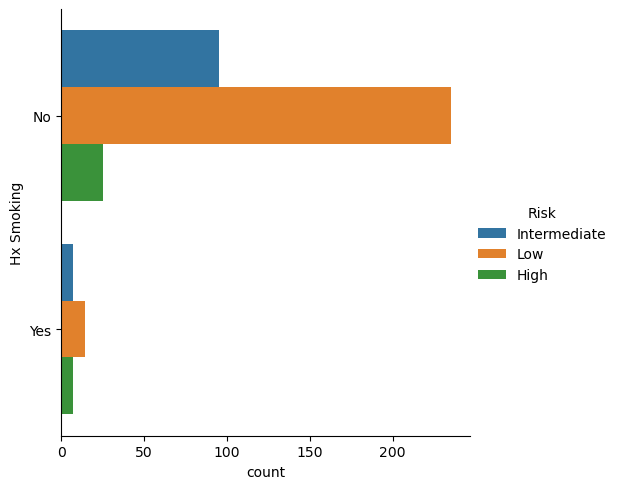

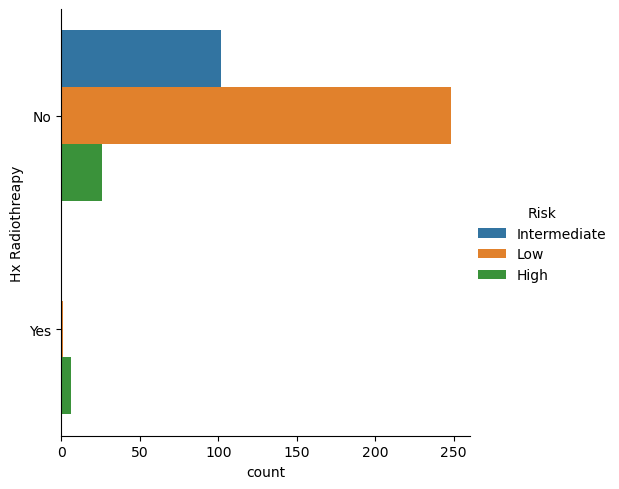

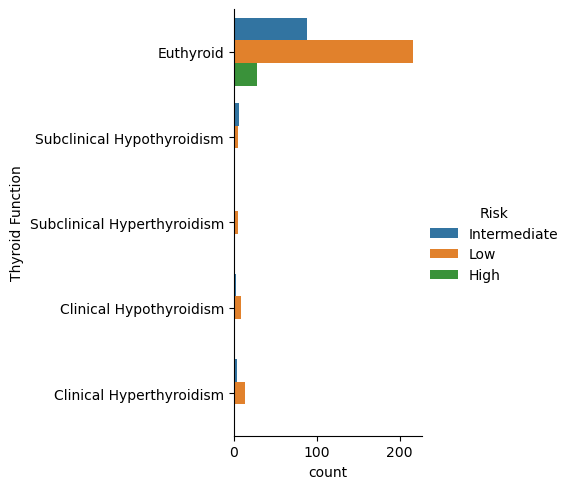

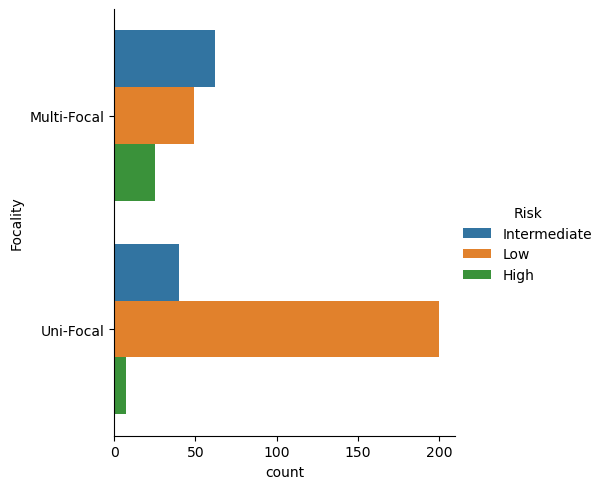

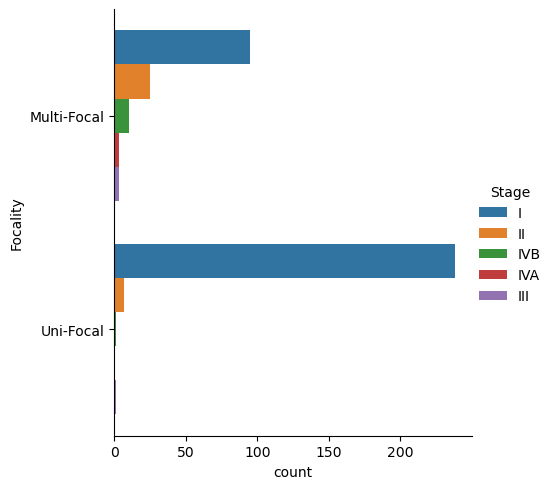

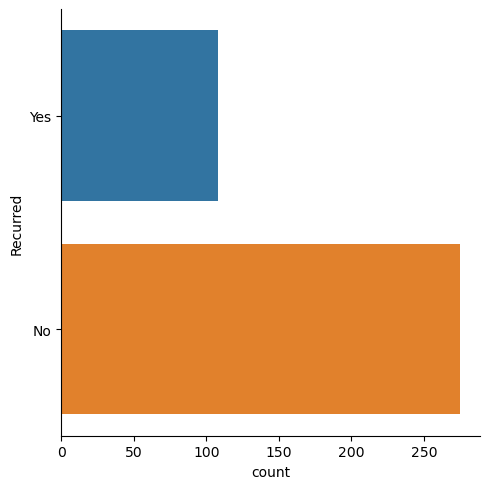

In [ ]:
sns.color_palette('colorblind')
sns.catplot(data=disease, y='Smoking',orient='v',kind='count',hue='Recurred')
sns.catplot(data=disease, y='Risk',orient='v',kind='count',hue='Recurred')
sns.catplot(data=disease,y='age_range' ,kind='count',hue='Smoking')
sns.catplot(data=disease,y='Hx Smoking' ,kind='count',hue='Risk')
sns.catplot(data=disease,y='Hx Radiothreapy' ,kind='count',hue='Risk')
sns.catplot(data=disease,y='Thyroid Function' ,kind='count',hue='Risk')
sns.catplot(data=disease,y='Focality' ,kind='count',hue='Risk')
sns.catplot(data=disease,y='Focality' ,kind='count',hue='Stage')
sns.catplot(data=disease,y='Recurred' ,kind='count')

In [ ]:
disease.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'age_range'],
      dtype='object')

In [ ]:
!pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyClassifier
# # from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# # data = load_breast_cancer()
# X = disease[['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
#              'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
#              'Focality','T', 'N', 'M', 'Stage', 'Response', 'Recurred',
#              'age_range']]
# y= disease.Risk

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2)
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [ ]:
# # init setup
# from pycaret.classification import *
# clf = setup(data = disease, target = 'Risk', fix_imbalance = True)
# clf

In [ ]:
# disease['Risk'].value_counts()
# clf.